# Assignment 4: Creating a complex molecular system using mBuild

For this assignment, you will need to fill in the necessary code to complete the two classes below. The first class should be used to instantiate a single molecule of (3,3,4,4,5,5,6,6,6-Nonafluorohexyl)benzene (NFHB). The second class will need to utilize the first class, and should return a box of NFHB molecules. Finally, you will need to instantiate your `NFHB_box` class to create a system featuring 100 NFHB molecules in a 3nm x 3nm x 3nm box, and save to Gromacs topology format (.top extension), making to sure to pass the necessary flag to the save command to atom-type the system using the OPLS-AA force field. Here is a link to the mBuild documentation for reference: http://mosdef-hub.github.io/mbuild/.

<img src="nfhb.png">

Import mBuild and our visualization routine

In [1]:
%matplotlib inline
from visualize import visualize
import mbuild as mb

Define a class for a single molecule of NFHB. Use the provided structure files for benzene, CH2, CF2, and CF3.

In [2]:
class NFHB(mb.Compound):
    """A single molecule of (3,3,4,4,5,5,6,6,6-Nonafluorohexyl)benzene. """
    def __init__(self):
        super(NFHB, self).__init__()
        
        ch2 = mb.load('ch2.pdb')
        carbon = list(ch2.particles_by_name('C'))[0]
        up_port = mb.Port(anchor=carbon, orientation=[0, 1, 0], separation=0.075)
        down_port = mb.Port(anchor=carbon, orientation=[0, -1, 0], separation=0.075)
        ch2.add(up_port, label='up')
        ch2.add(down_port, label='down')                   
        ch2_copy = mb.clone(ch2)
        mb.force_overlap(move_this=ch2_copy,
                     from_positions=ch2_copy['up'],
                     to_positions=ch2['down'])
        #self = mb.Compound()
        self.add(ch2, label='ch2[$]')
        self.add(ch2_copy, label='ch2[$]')

        benz = mb.load('benzene.pdb')
        benz.remove(benz[10])
        up_port = mb.Port(anchor=benz[4], orientation=[0, -1, 0], separation=0.075)
        benz.add(up_port, label='up')
        mb.force_overlap(move_this=benz,
                     from_positions=benz['up'],
                     to_positions=self['ch2[0]']['up'])
        self.add(benz, label='benzene')

        cf2 = mb.load('cf2.pdb')
        carbon = list(cf2.particles_by_name('C'))[0]
        up_port = mb.Port(anchor=carbon, orientation=[0, 1, 0], separation=0.075)
        down_port = mb.Port(anchor=carbon, orientation=[0, -1, 0], separation=0.075)
        cf2.add(up_port, label='up')
        cf2.add(down_port, label='down')
        cf2_copy = mb.clone(cf2)
        cf2_copy2 = mb.clone(cf2_copy)
        mb.force_overlap(move_this=cf2,
                     from_positions=cf2['down'],
                     to_positions=self['ch2[1]']['down'])
        self.add(cf2, label='cf2[$]')
        #visualize(self)
        mb.force_overlap(move_this=cf2_copy,
                     from_positions=cf2_copy['up'],
                     to_positions=self['cf2[0]']['up'])
        self.add(cf2_copy, label='cf2[$]')
        #visualize(self)
        mb.force_overlap(move_this=cf2_copy2,
                    from_positions=cf2_copy2['down'],
                    to_positions=self['cf2[1]']['down'])
        self.add(cf2_copy2, label='cf2[$]')
        #visualize(self)

        #attach terminal trifluoromethyl group
        cf3 = mb.load('cf3.pdb')
        carbon = list(cf3.particles_by_name('C'))[0]
        down_port = mb.Port(anchor=carbon, orientation=[0, -1, 0], separation=0.075)
        cf3.add(down_port, label='down')
        mb.force_overlap(move_this=cf3,
                         from_positions=cf3['down'],
                         to_positions=self['cf2[2]']['up'])
        self.add(cf3, label='cf3($)')
        #visualize(self)

# Visualize to make sure the class was defined correctly.

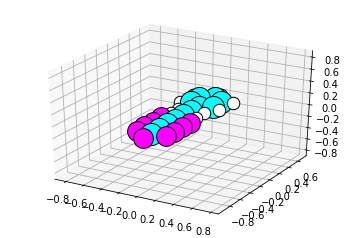

In [3]:
nfhb = NFHB()
visualize(nfhb)

Define a class for a box of NFHB molecules.

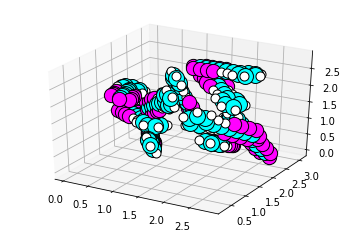

In [4]:
class NFHB_box(mb.Compound):
    """A box of NFHB molecules. 
    
    Parameters
    ----------
    n : int
        The number of molecules to place in the box.
    box_length : float, optional, default=3.0
        The dimension of the box in each dimention (in nm). The class will
        assume a cubic box.
    
    """
    def __init__(self, n, box_length=3.0):
        super(NFHB_box, self).__init__()
        
        box = mb.fill_box(nfhb, n_compounds=n, box=[3, 3, 3])
        self.add(box)

boxy = NFHB_box(10) 
visualize(boxy)

Now, create a box of 100 NFHB molecules and save to a Gromacs topology file (.top extension), applying the OPLS-AA force field. Make sure to pass any necessary flags to the save command so that the Compound will be atom-typed by Foyer.

In [5]:
NFHB_box_100 = NFHB_box(100)
NFHB_box_100.save('NFHB_box_100.top', forcefield_name='oplsaa')

/home/nikki/anaconda3/envs/mosdef35/lib/python3.5/site-packages/foyer/validator.py:159: ValidationWarning: The following atom types do not have smarts definitions: opls_001, opls_002, opls_003, opls_004, opls_005, opls_006, opls_007, opls_008, opls_009, opls_010, opls_011, opls_012, opls_013, opls_014, opls_015, opls_016, opls_017, opls_018, opls_019, opls_020, opls_021, opls_022, opls_023, opls_024, opls_025, opls_026, opls_027, opls_028, opls_029, opls_030, opls_031, opls_032, opls_033, opls_034, opls_035, opls_036, opls_037, opls_038, opls_039, opls_040, opls_041, opls_042, opls_043, opls_044, opls_045, opls_046, opls_047, opls_048, opls_049, opls_050, opls_051, opls_052, opls_053, opls_054, opls_055, opls_056, opls_057, opls_058, opls_059, opls_060, opls_061, opls_062, opls_063, opls_064, opls_065, opls_066, opls_067, opls_068, opls_069, opls_070, opls_071, opls_072, opls_073, opls_074, opls_075, opls_076, opls_077, opls_078, opls_079, opls_080, opls_081, opls_082, opls_083, opls_0